<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Status" data-toc-modified-id="Status-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Status</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#2-Nodes" data-toc-modified-id="2-Nodes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2 Nodes</a></span><ul class="toc-item"><li><span><a href="#Initial-setup" data-toc-modified-id="Initial-setup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initial setup</a></span></li><li><span><a href="#New-Init" data-toc-modified-id="New-Init-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>New Init</a></span></li><li><span><a href="#New-Init-with-step" data-toc-modified-id="New-Init-with-step-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>New Init with step</a></span></li><li><span><a href="#Quickly-re-convincing-myself-that-the-init-was-working" data-toc-modified-id="Quickly-re-convincing-myself-that-the-init-was-working-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Quickly re-convincing myself that the init was working</a></span><ul class="toc-item"><li><span><a href="#Checking-the-way-we-compute-the-balance" data-toc-modified-id="Checking-the-way-we-compute-the-balance-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Checking the way we compute the balance</a></span></li></ul></li><li><span><a href="#New-Init" data-toc-modified-id="New-Init-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>New Init</a></span></li><li><span><a href="#New-Init" data-toc-modified-id="New-Init-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>New Init</a></span></li></ul></li></ul></div>

# Status

I thought it was solved (because indeed we see we solve the appropriate problem and enforce the right constraints). However, we see that the balance still restarts at nearly 10^0 at every iteration (which seems far too high to me). 

So, either the problem I solve is the right one, or not. 



**Reminder**: how are the ri computed? 
- Initialization of all ri to 0
- We loop through the nodes
    - for the origin of the edge, we add the flow
    - for the destination of the edge, we substract the flow

Therefore, 
- A node with ri>0 is a node that is in deficit of rebalancers
- A node with ri<0 is a node that is in excess of rebalancers


**Reminder**: how do we update OD? 
- We add a pair $(n,R)$ for each node $n$ that is in excess. 

Currently we are solving the following problem: 
$$
\min_{f} \|f-f_r\| \\
\text{s.t.    } A_{in} f - A_{out} f = r\\
\text{        } f_R =  f_o^{net}\\
f\geq 0
$$

The second-last equation simply means that the flow on the rebalancing edge must be equal to the net rebalancing flow at the origin node of that edge. 

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

# Load

In [7]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

In [8]:
subfolder='unstucking_balance'

# 2 Nodes

the problem with only two nodes is that it might be a bit too "simplistic" ? 

In [68]:
n_nodes=2

In [69]:
path='Data/'+str(n_nodes)+'Nodes_back2basics/outputs/'+subfolder

In [70]:
print(os.listdir(path))

['new_init.pkl', 'initial_setup.pkl', 'new_init_with_step.pkl']


In [62]:
filename=os.listdir(path)[1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW1, OD, ri_FW1, n_outer, n_inner, balance1, opt_res1, OD_list, balance_list1, params = pickle.load(f)

initial_setup.pkl


In [63]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW2, OD, ri_FW2, n_outer, n_inner, balance2, opt_res2, OD_list, balance_list2, params = pickle.load(f)

new_init.pkl


In [71]:
filename=os.listdir(path)[2]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW3, OD, ri_FW3, n_outer, n_inner, balance3, opt_res3, OD_list, balance_list3, params = pickle.load(f)

new_init_with_step.pkl


## Initial setup

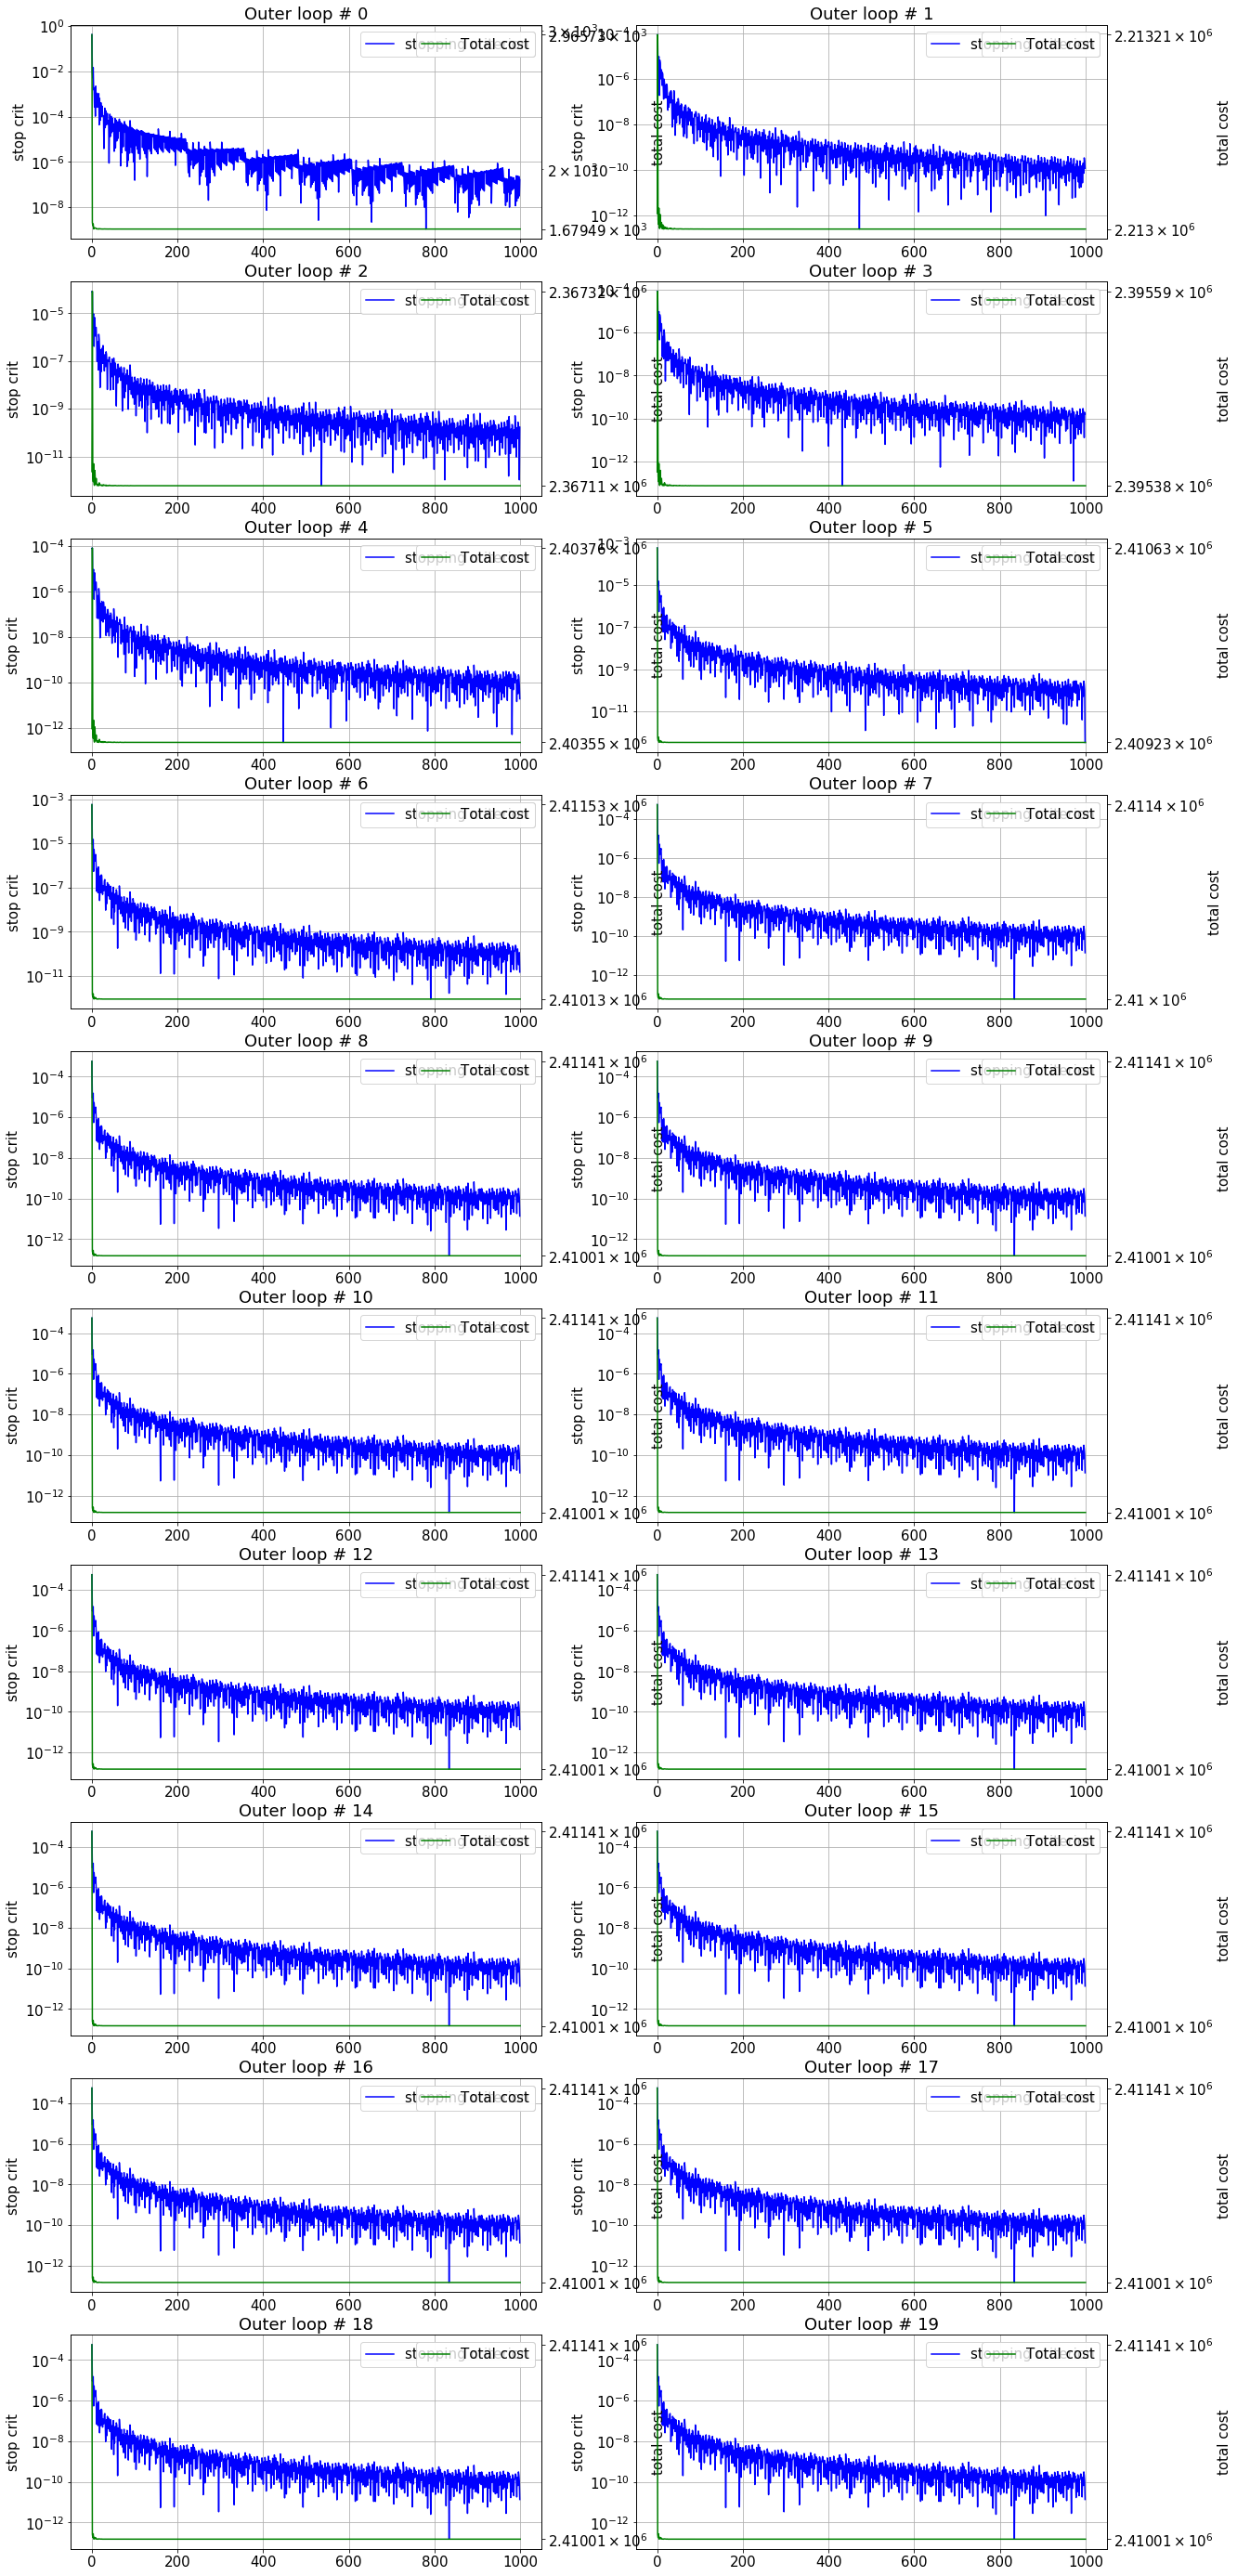

In [21]:
plot_stop_and_cost(opt_res1)

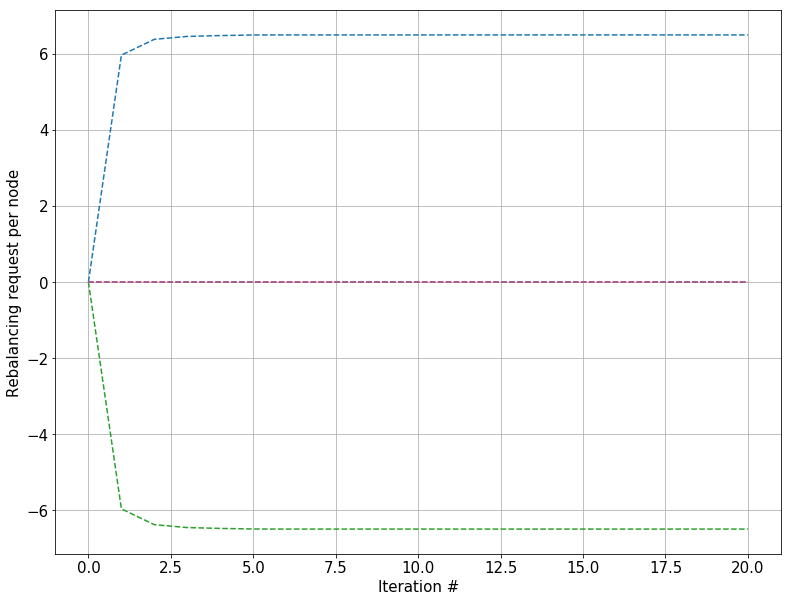

In [22]:
plot_ri_list(ri_FW1, save = False, path = None)

/Users/lucasfuentes/ASL/ICU/amod_ed/result_analysis.py:309: RuntimeWarning: divide by zero encountered in double_scalars
  r_p.append(np.abs(balance_list[n][k]-balance_list[n][k+1])/balance_list[n][k])


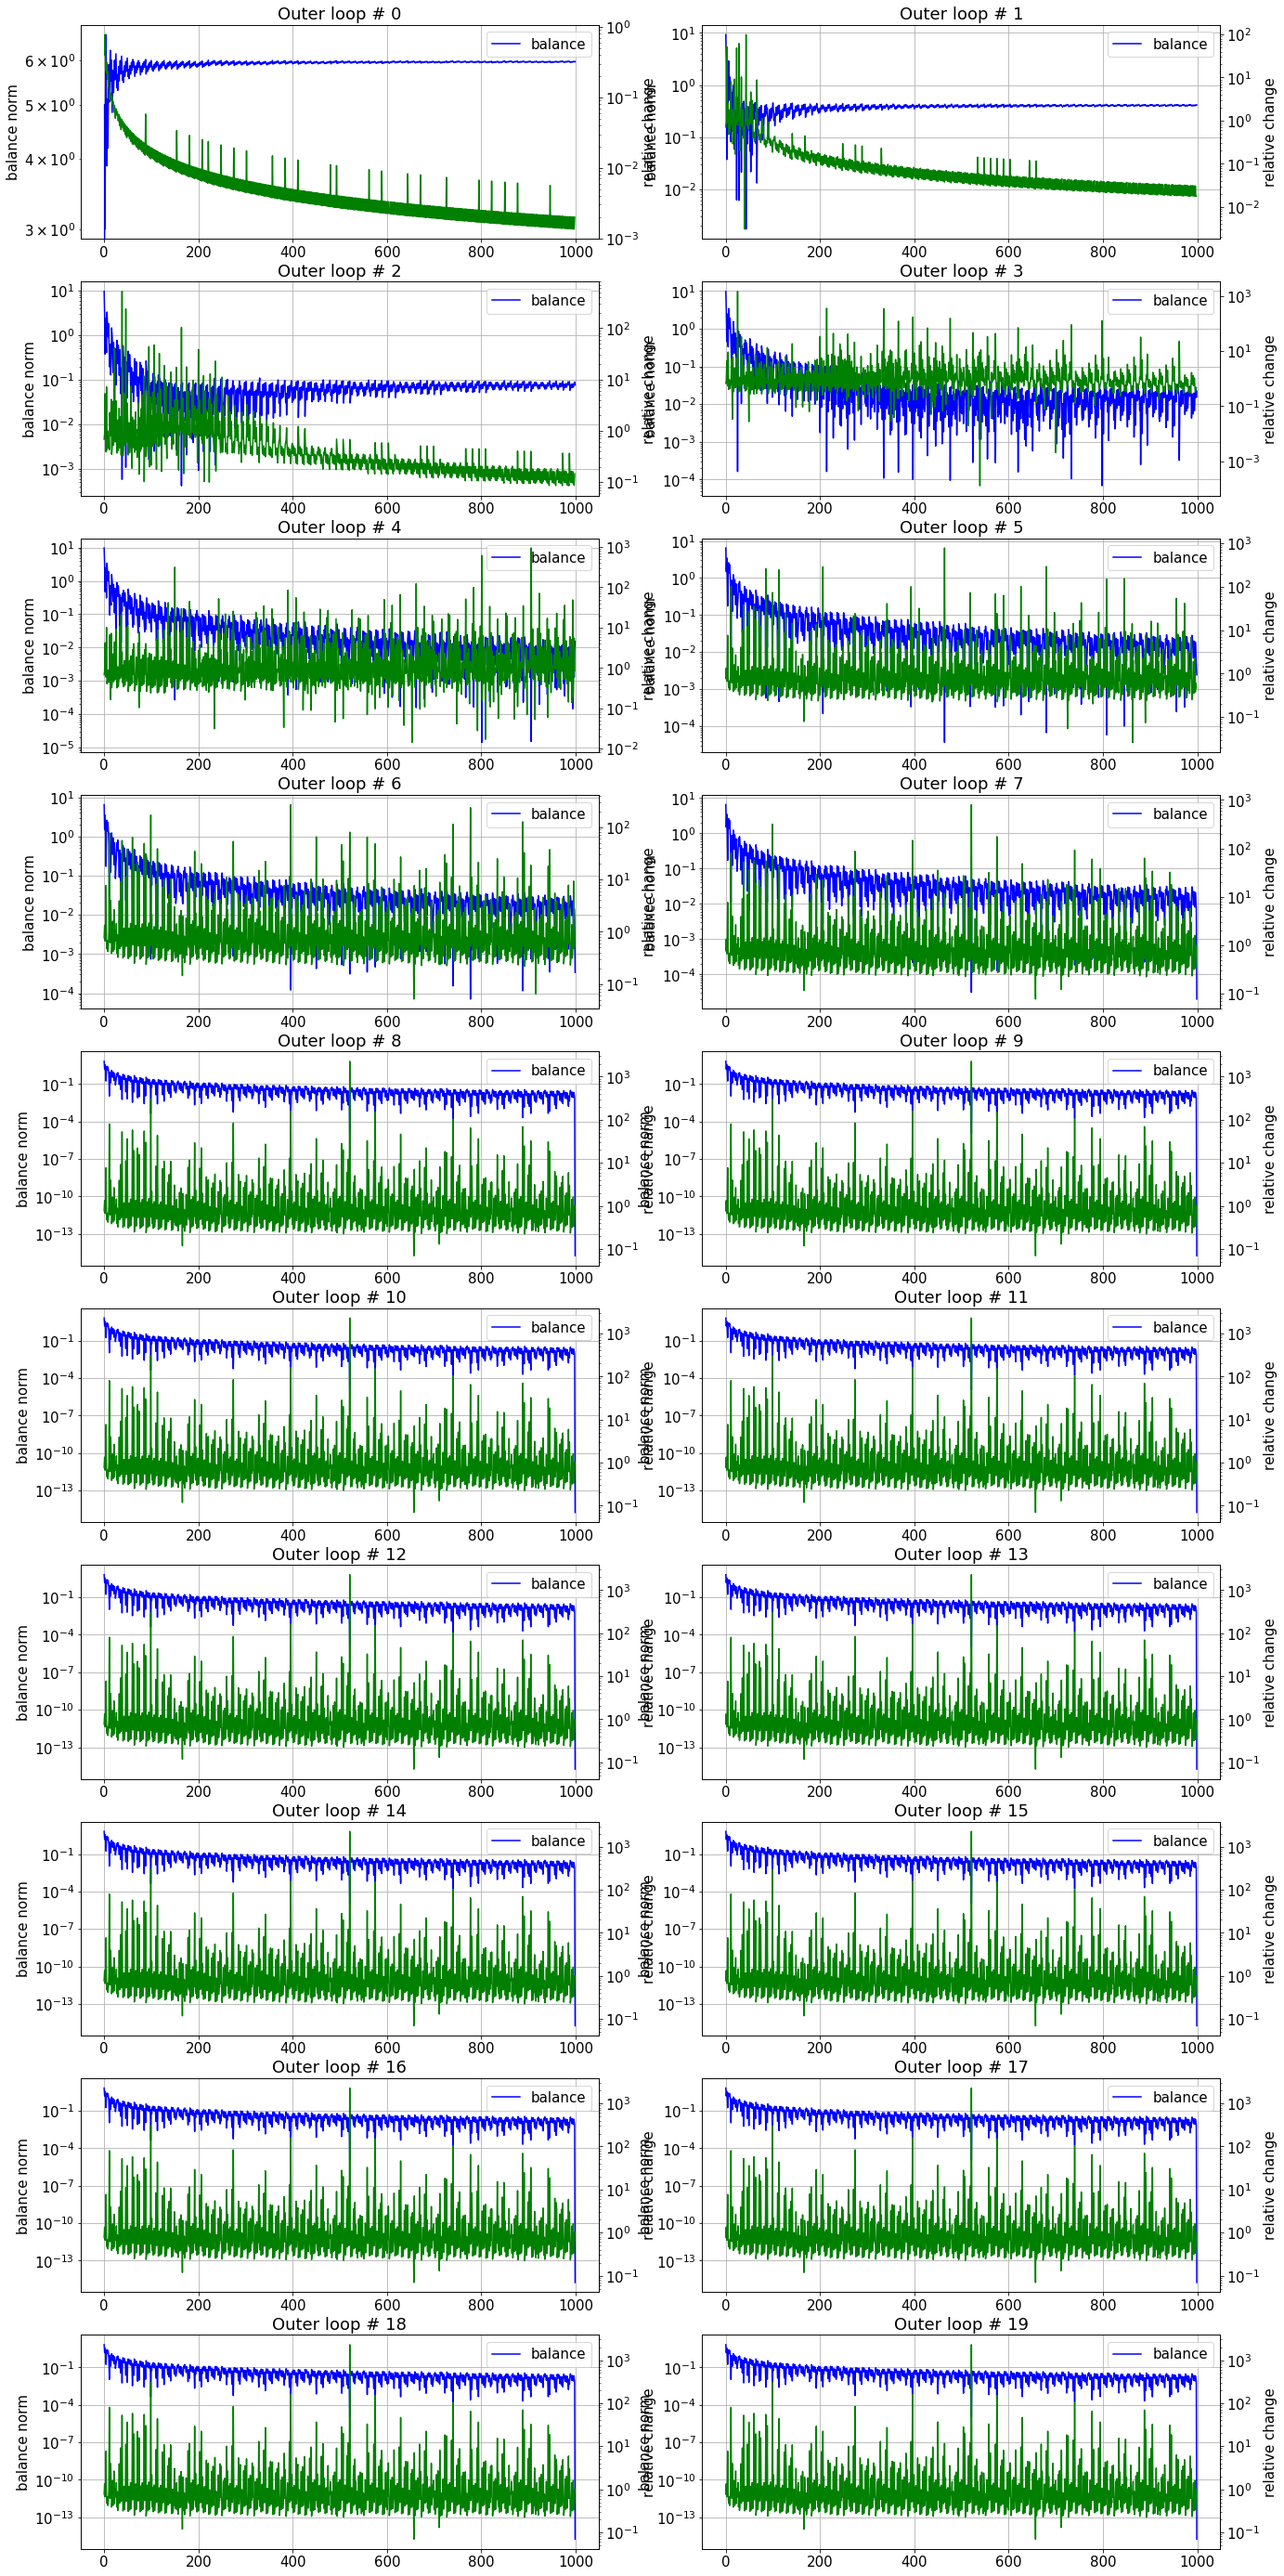

In [23]:
plot_balance_list(balance_list1, b_scale='log')

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

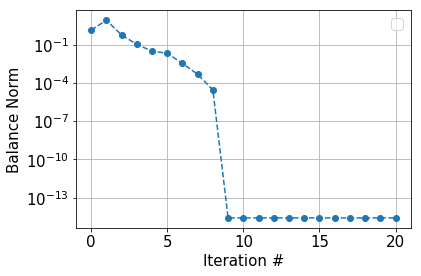

In [25]:
b=np.linalg.norm(balance1, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

## New Init

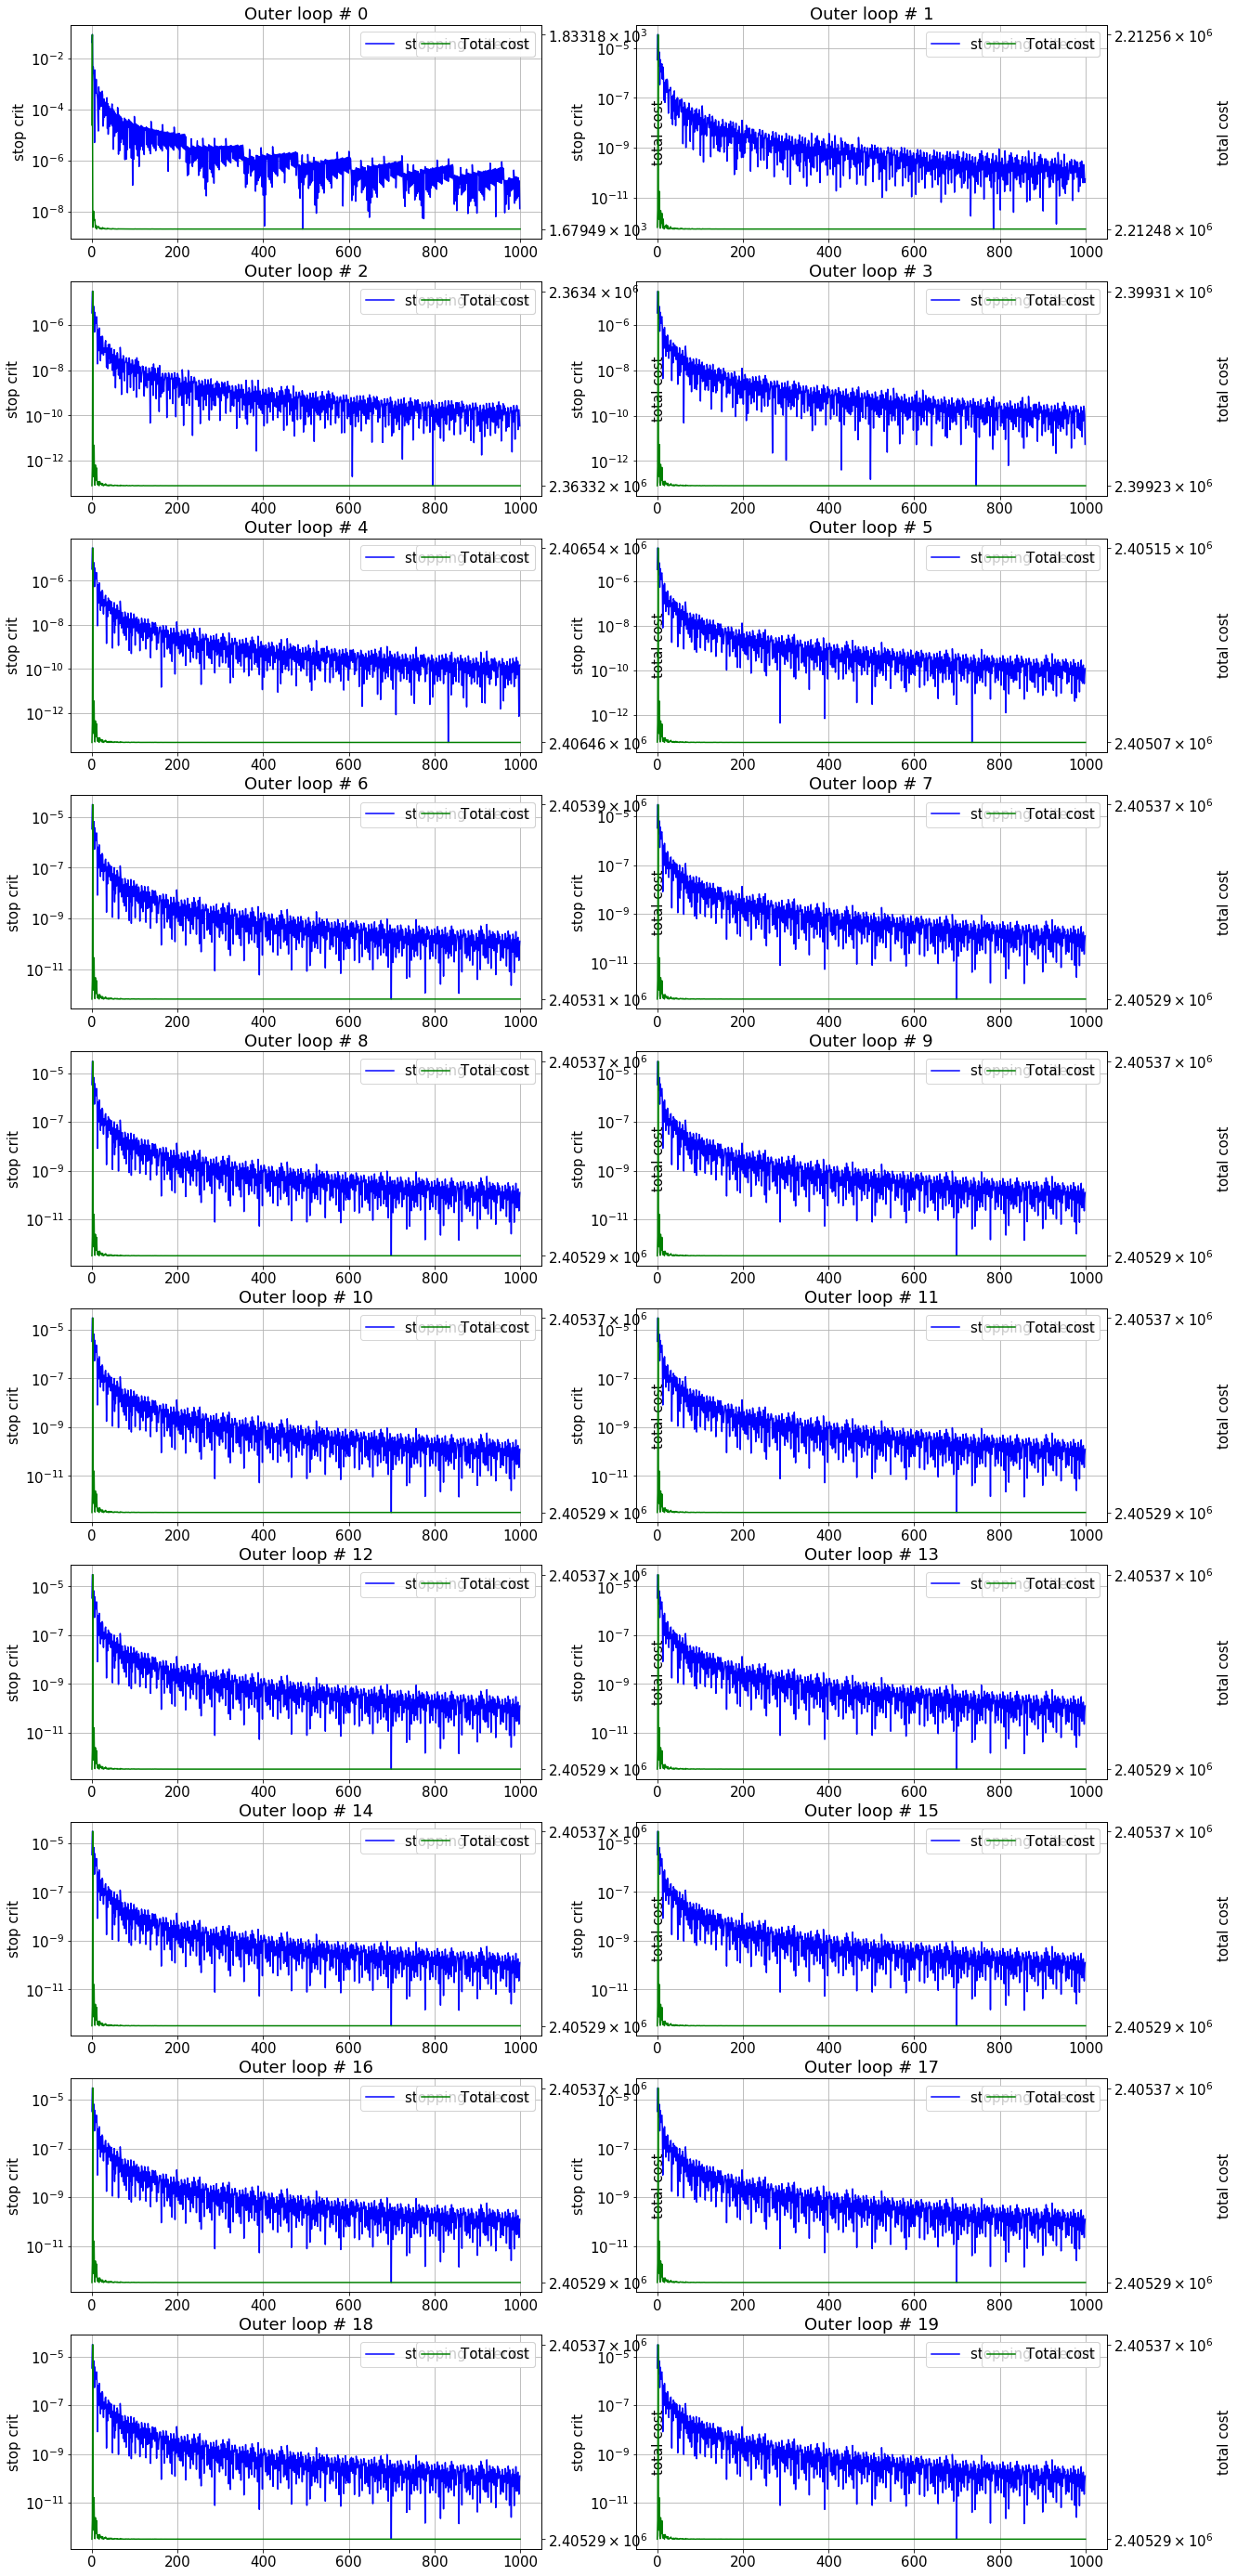

In [64]:
plot_stop_and_cost(opt_res2)

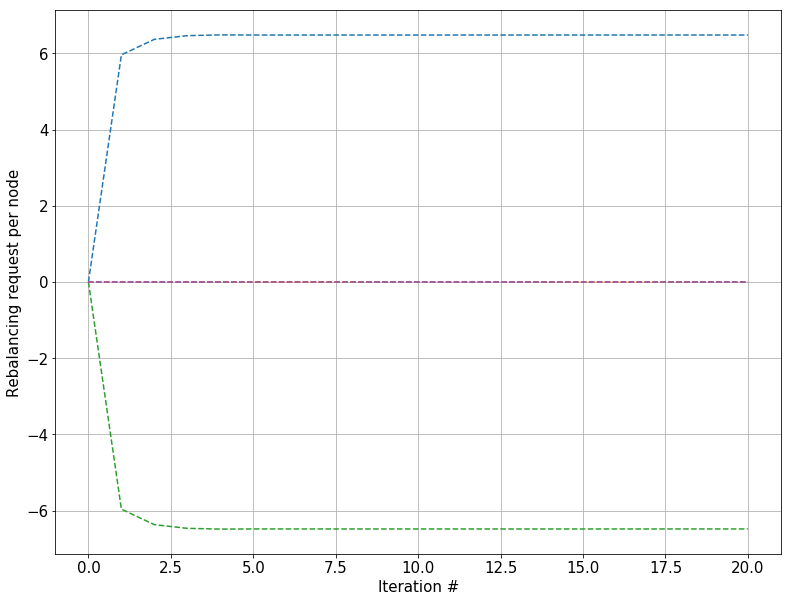

In [65]:
plot_ri_list(ri_FW2, save = False, path = None)

One problem solved: we see that the first value of the balance norm is now pretty much 0 (because for 2 nodes it is pretty easy to solve the problem) but then jumps again. Why? My guess is because of the step size!!

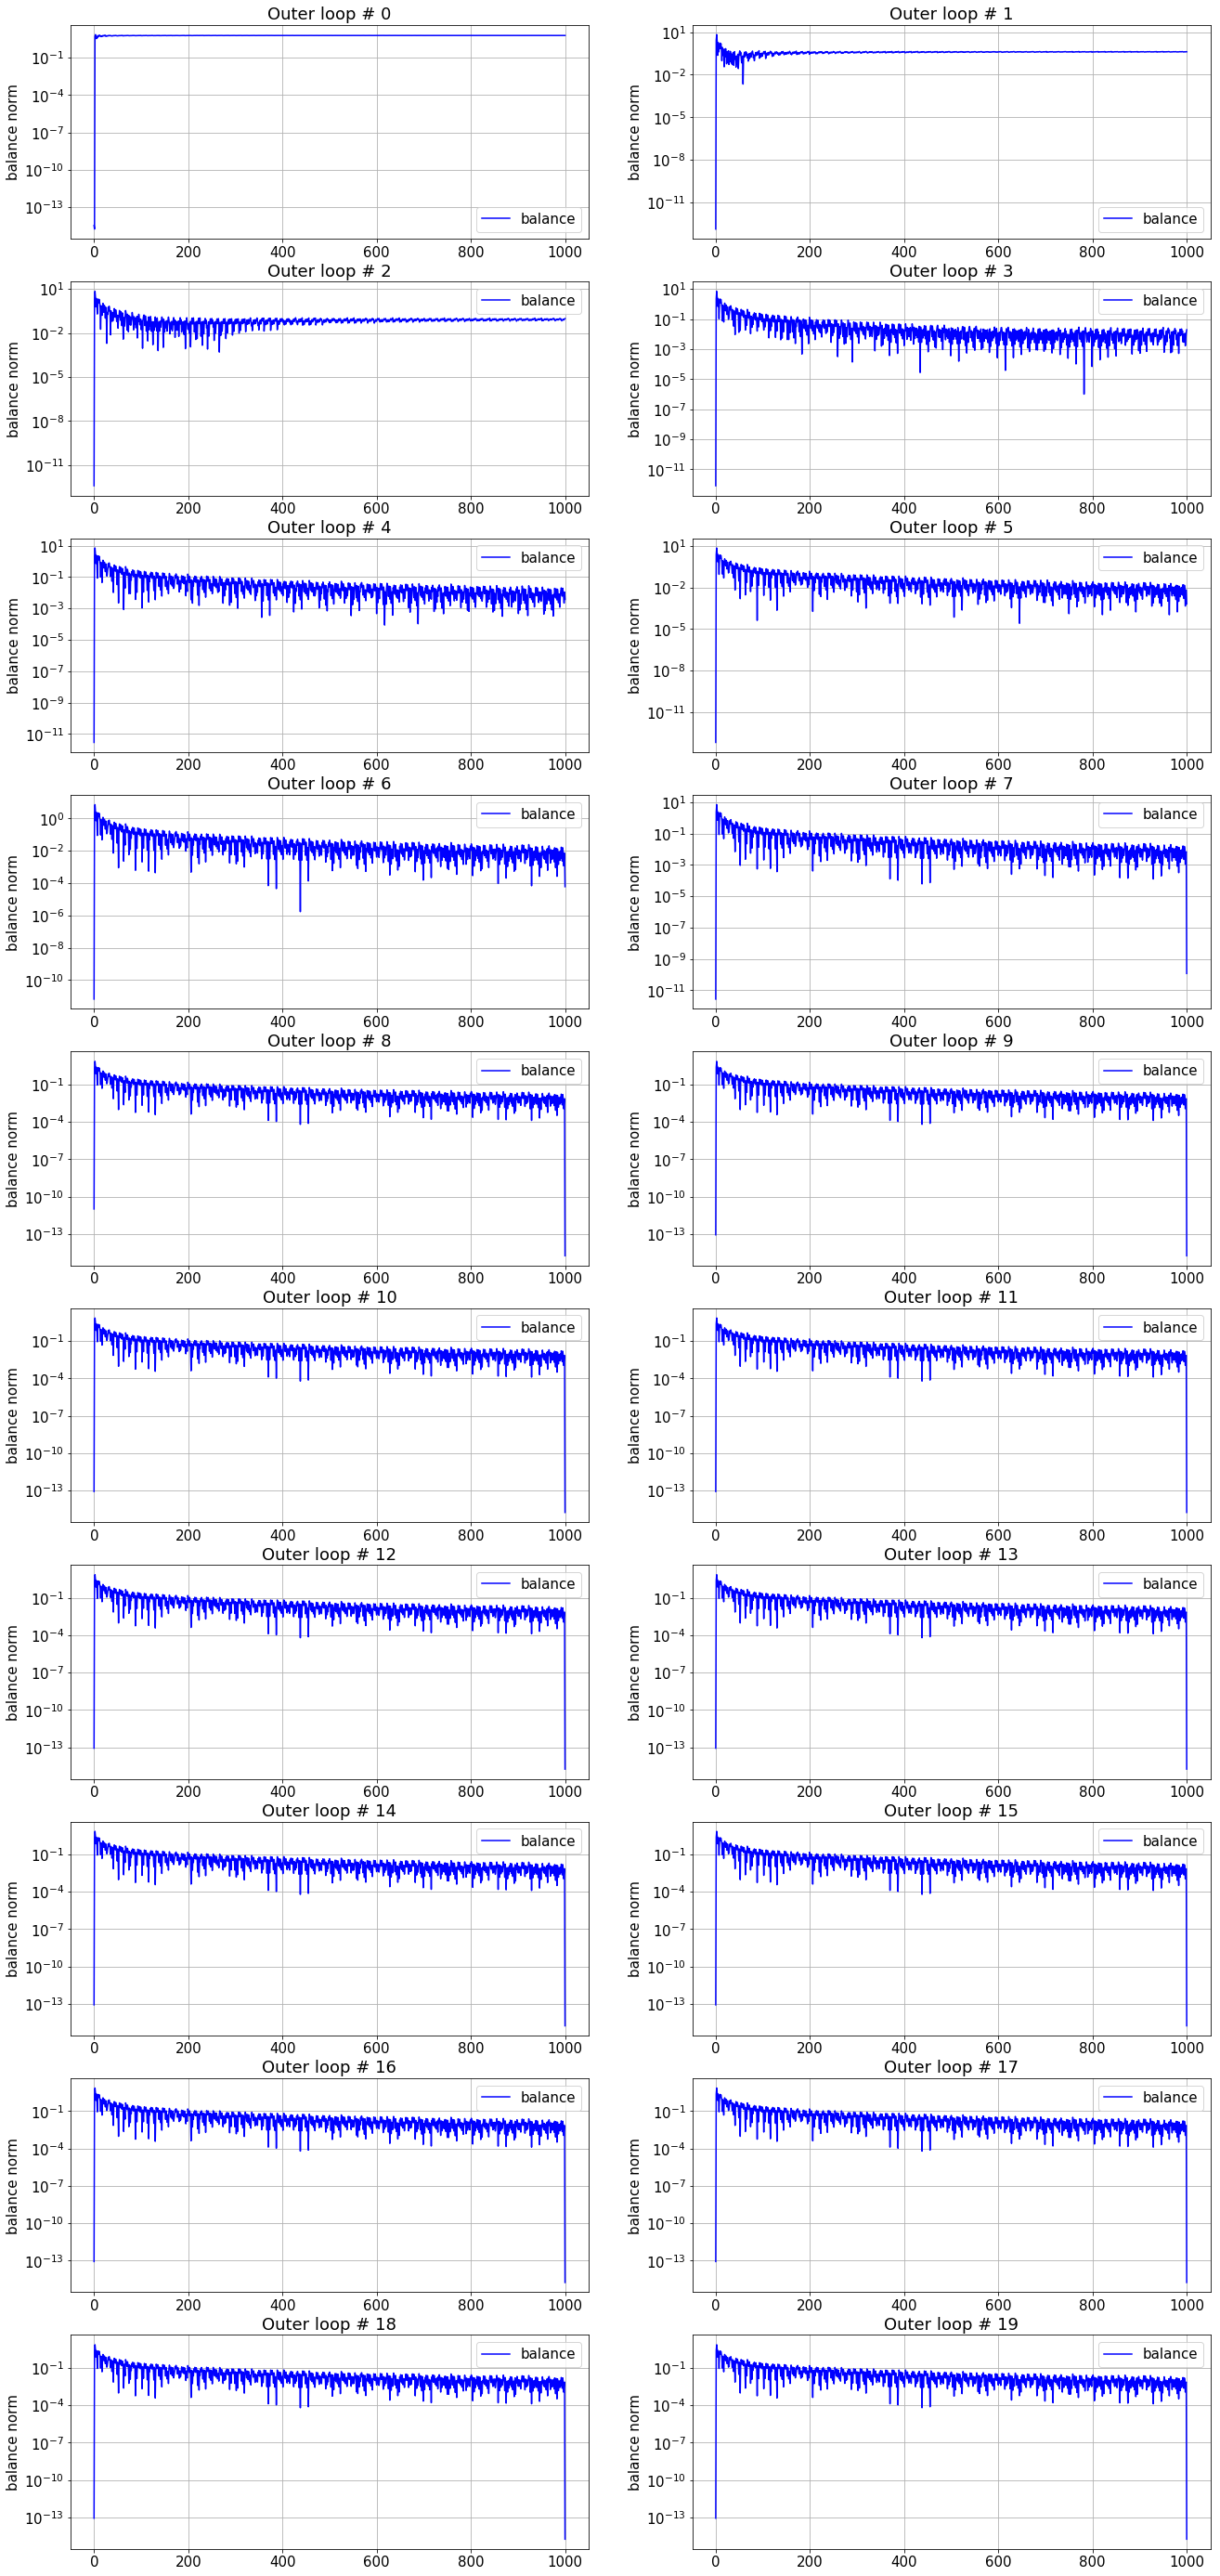

In [67]:
plot_balance_list(balance_list2, b_scale='log')

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

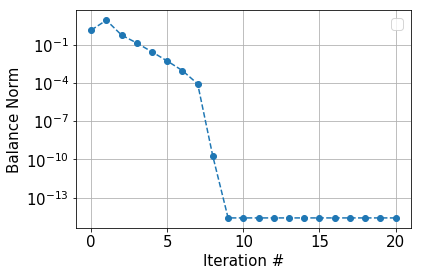

In [31]:
b=np.linalg.norm(balance2, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

## New Init with step

Here we keep the step size starting from iteration 10

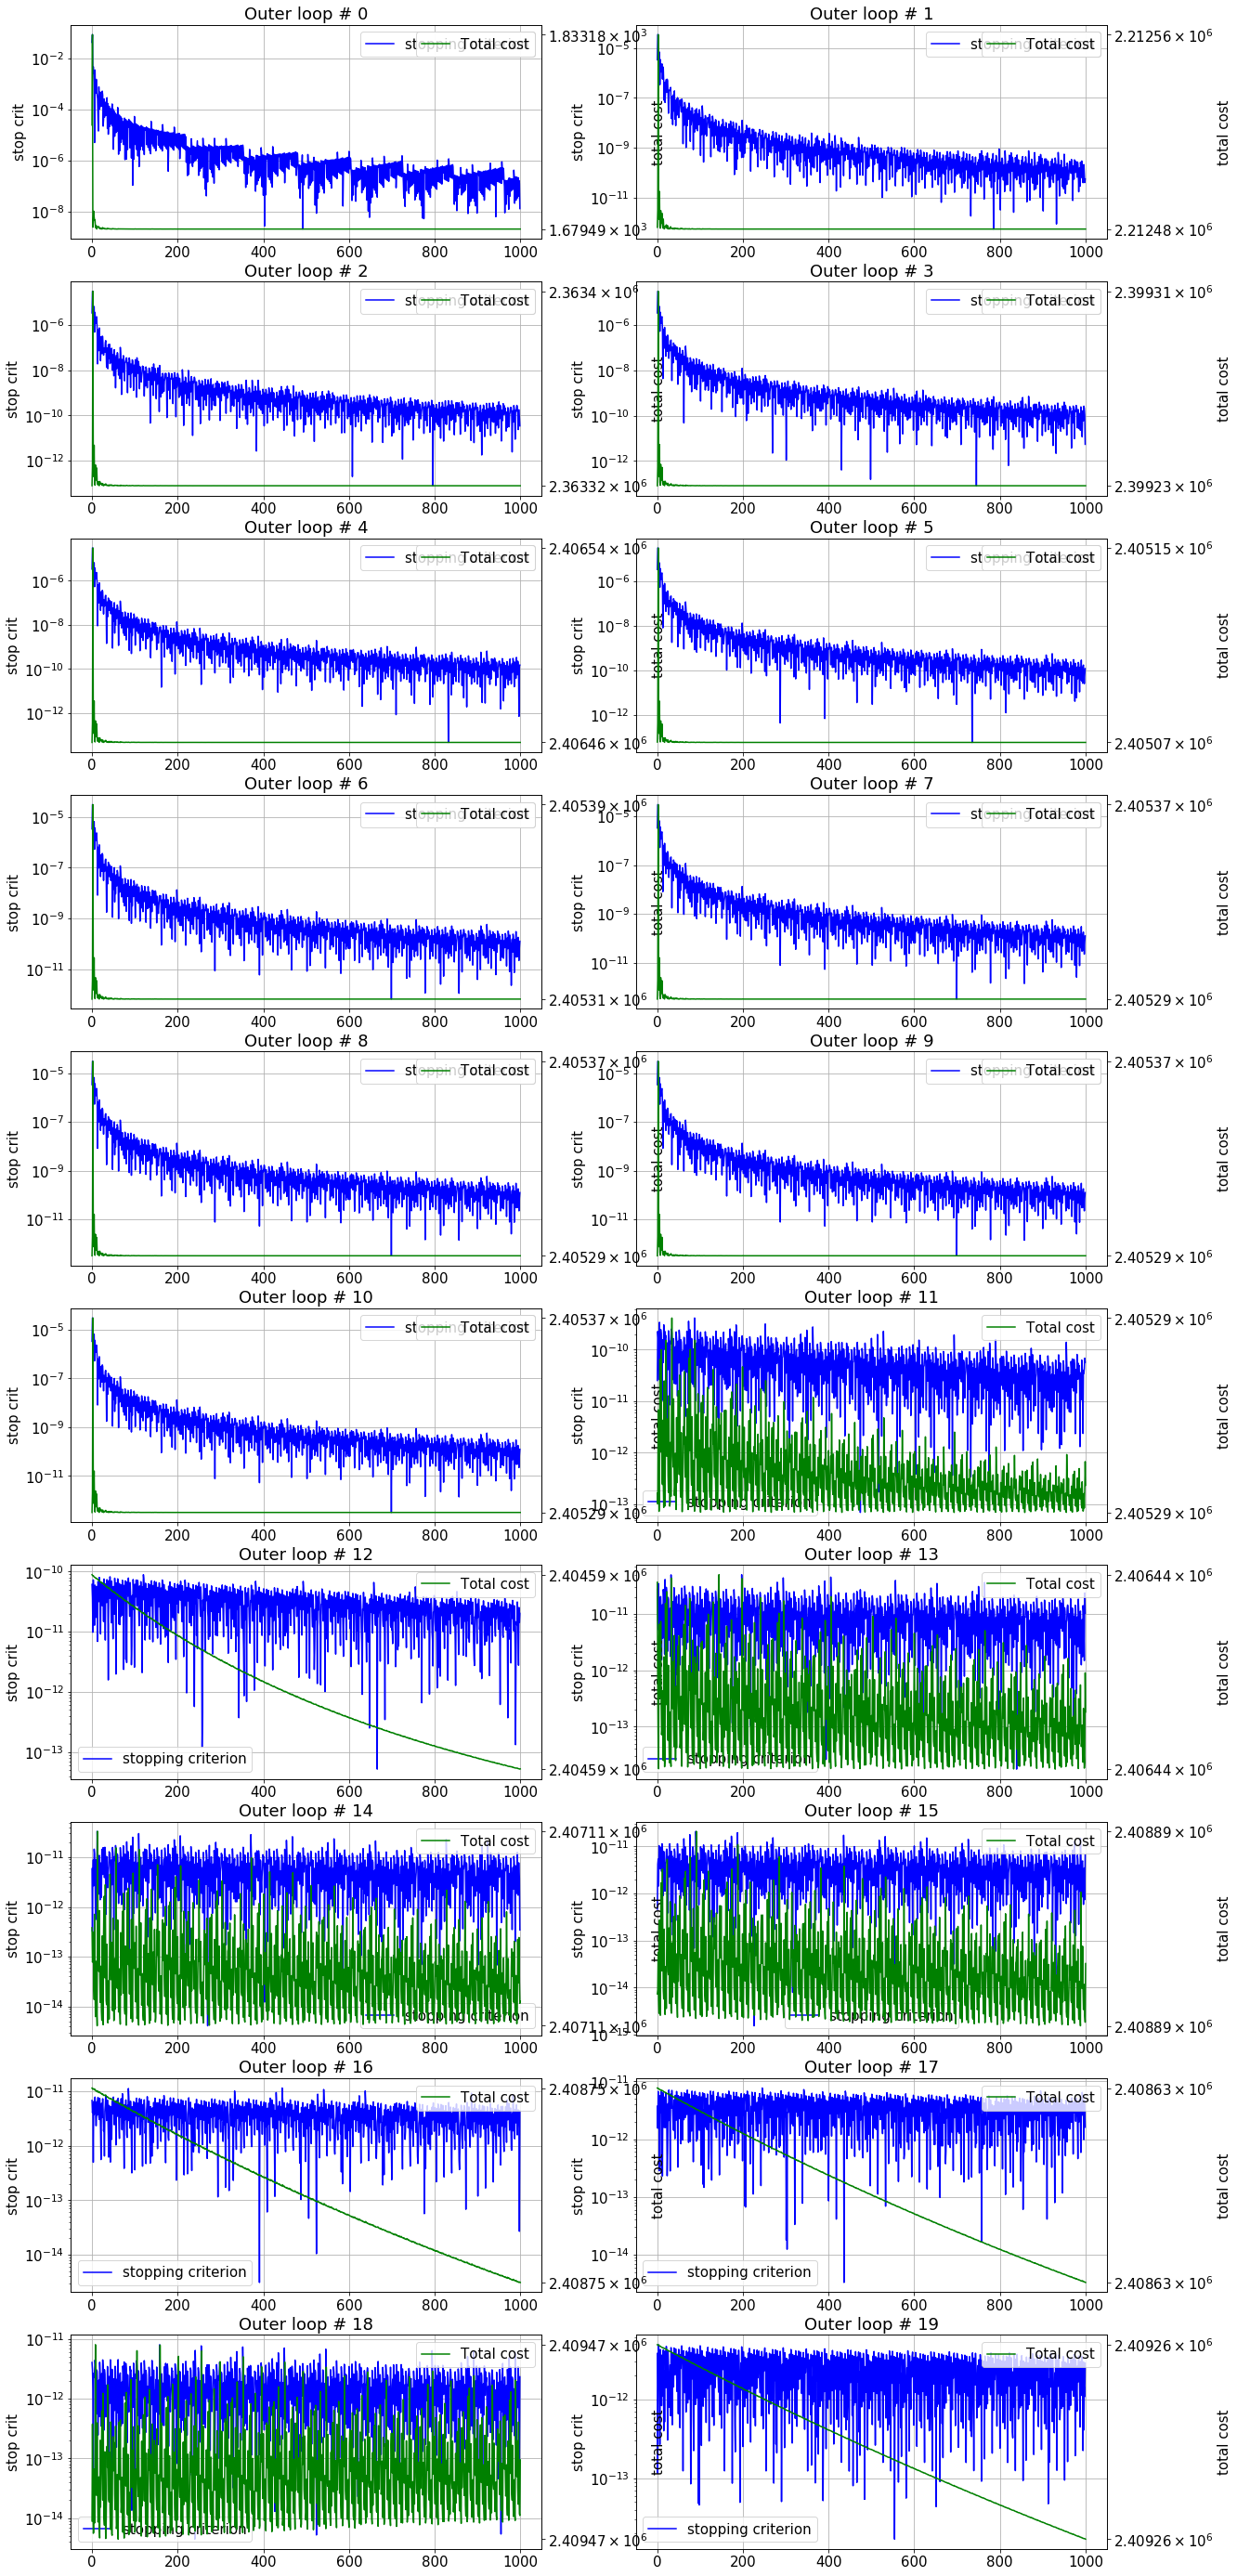

In [72]:
plot_stop_and_cost(opt_res3)

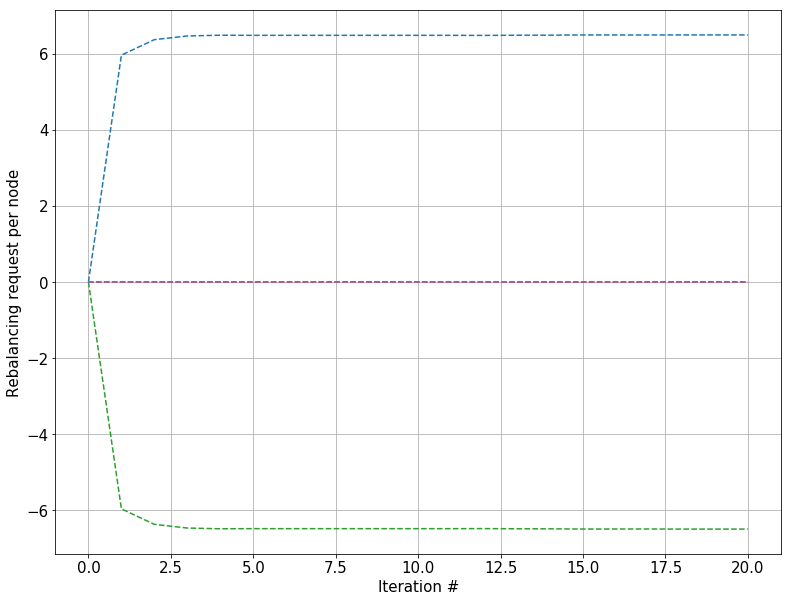

In [73]:
plot_ri_list(ri_FW3, save = False, path = None)

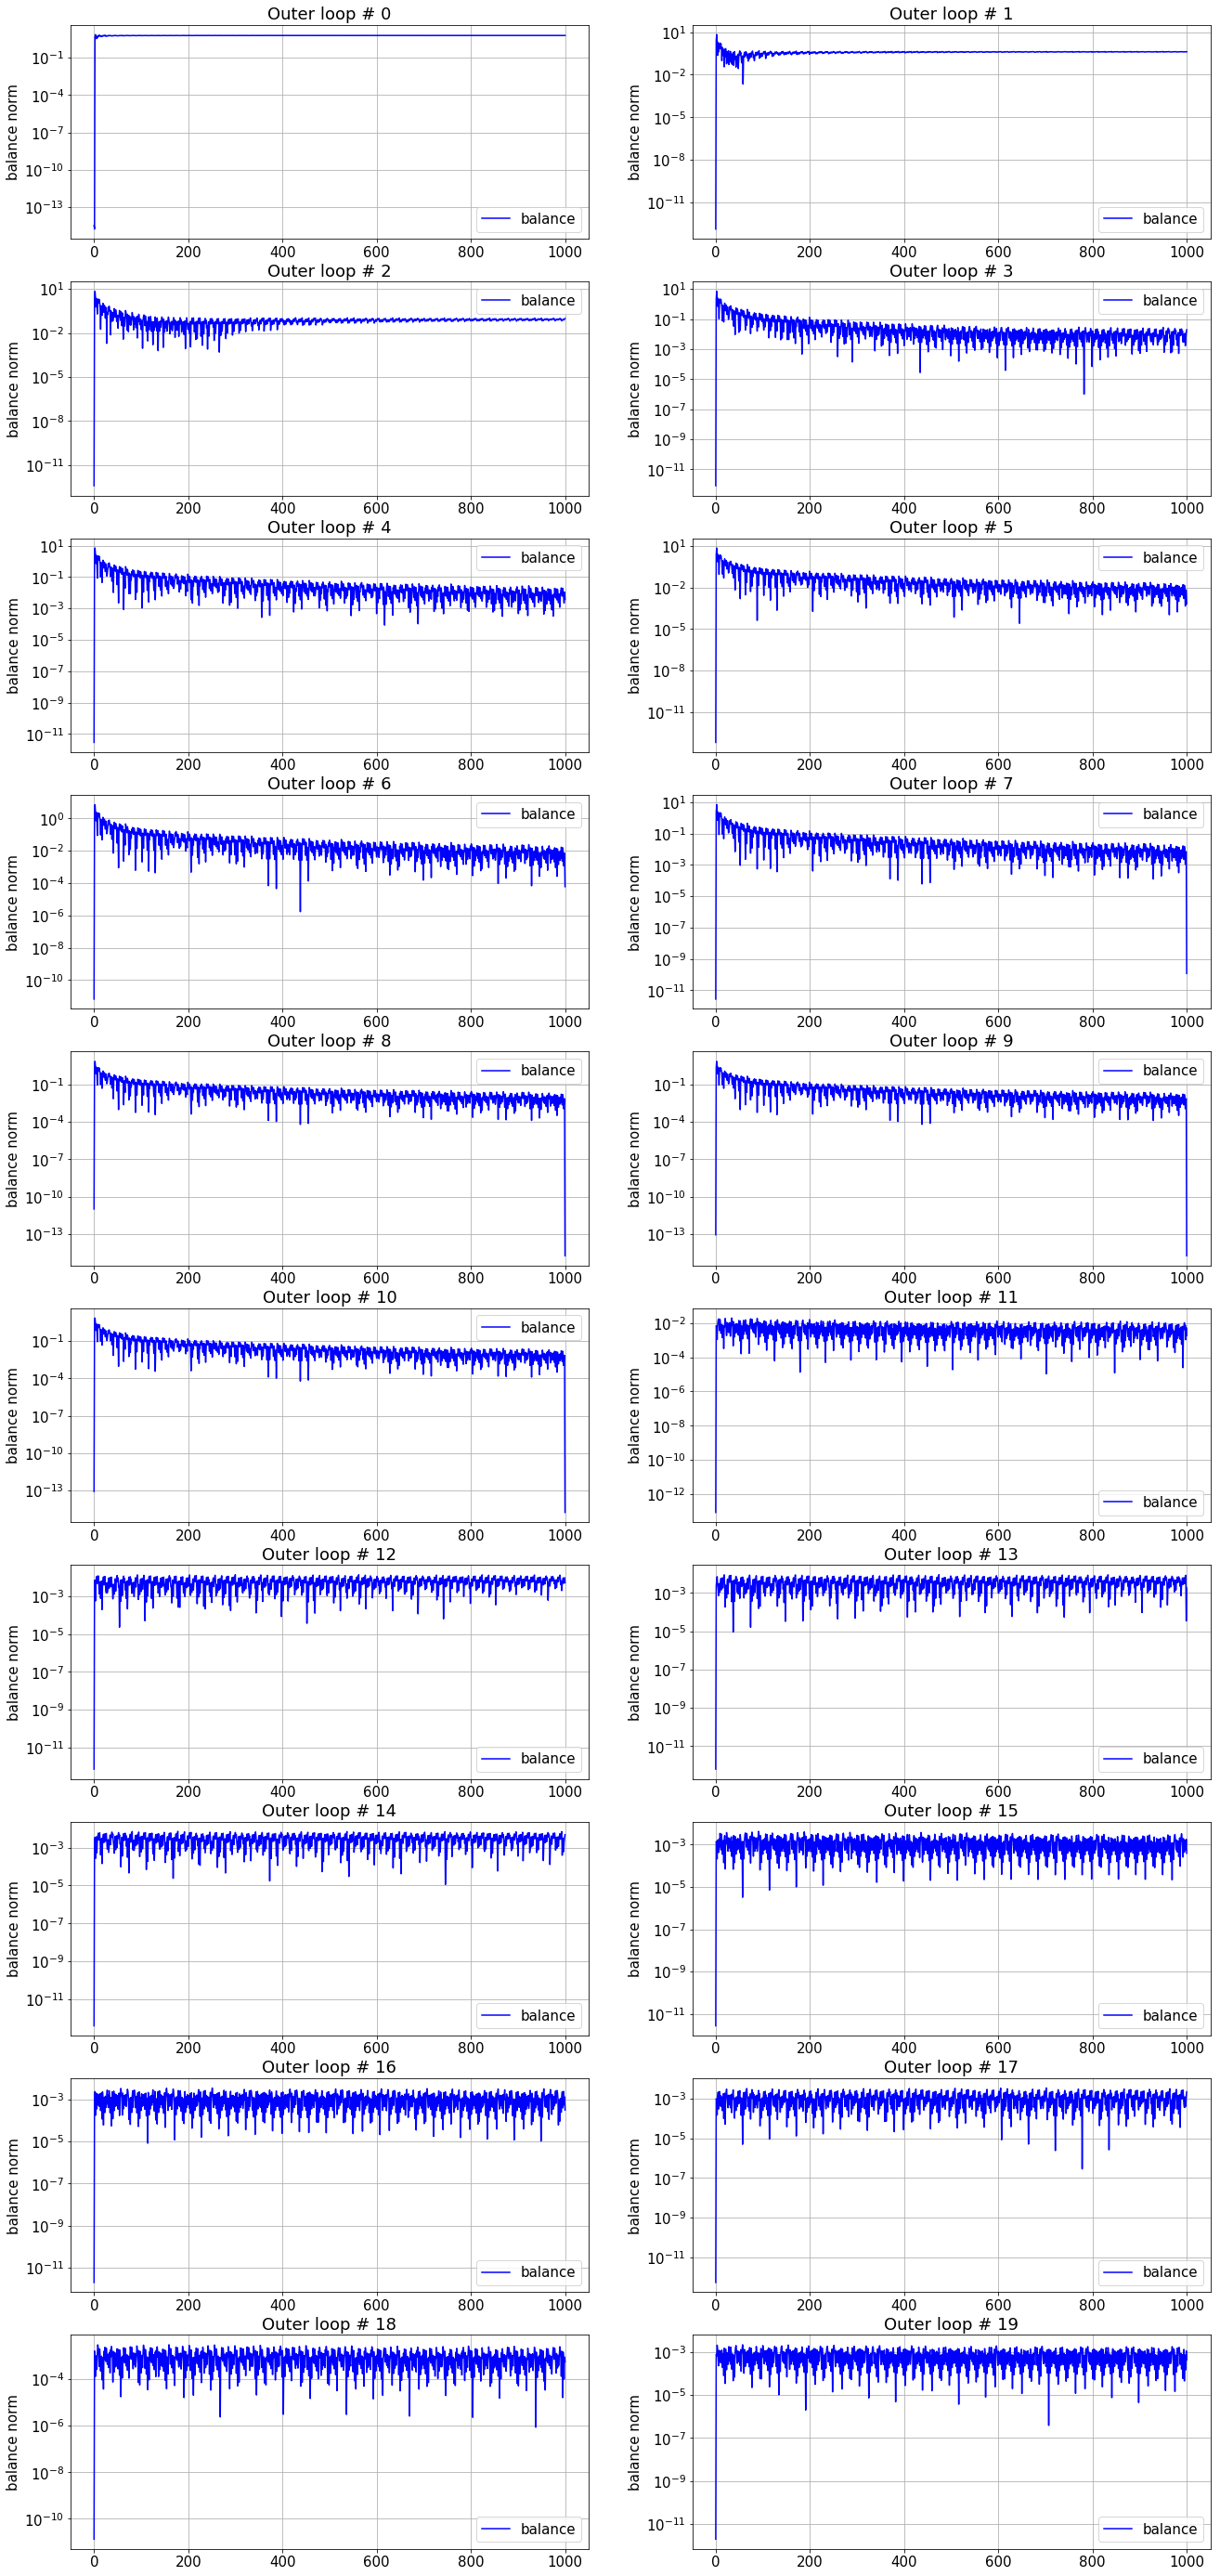

In [74]:
plot_balance_list(balance_list3, b_scale='log')

I believe the problem we solve is the right one. How can we explain that we do not see any improvement in the balance, though? 

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

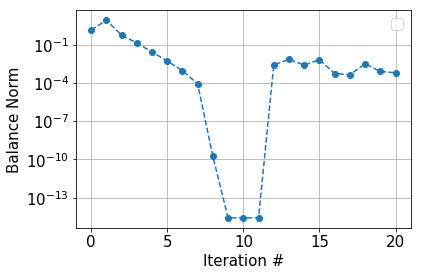

In [75]:
b=np.linalg.norm(balance3, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

## Quickly re-convincing myself that the init was working

Below is the initial setup. We see that indeed the flows are initialized on a shortest paths basis. The reason that the rebalancing flow 0 to R is "exact" is simply because there is only one path between 1 and R. 

In [32]:
for e in G_FW1[-1][0].edges():
    print(e, G_FW1[-1][0][e[0]][e[1]]['f_m']+G_FW1[-1][0][e[0]][e[1]]['f_r'])

('0', '1') 10
('0', 'R') 6.494304099094502
('0', '1_p') 10
('0', '0_p') 0
('1', '0') 16.494304099094503
('1', 'R') 0
('1', '0_p') 10
('1', '1_p') 0


Below is the new initialization. We compare the last flows at iteration t_f-1 and the first one at t_f. We see the flows are nearly identical, even for the rebalancing edges, indicating a probably good initialization. 

In [41]:
for e in G_FW2[-2][-1].edges():
    print(e, G_FW2[-2][-1][e[0]][e[1]]['f_m'], ' ---', G_FW2[-2][-1][e[0]][e[1]]['f_r'])

('0', '1') 9.271206380857432  --- 7.32810645968178e-17
('0', 'R') 0.0  --- 6.481575274177471
('0', '1_p') 2.7896311066799595  --- 0.0
('0', '0_p') 0.7287936191425722  --- 0.0
('1', '0') 2.7896311066799595  --- 6.481575274177471
('1', 'R') 0.0  --- 0
('1', '0_p') 9.271206380857432  --- 0.0
('1', '1_p') 7.210368893320038  --- 0.0


In [43]:
for e in G_FW2[-1][0].edges():
    print(e, G_FW2[-1][0][e[0]][e[1]]['f_m'], '---',G_FW2[-1][0][e[0]][e[1]]['f_r'])

('0', '1') 9.271206380857432 --- 3.675052529058022e-11
('0', 'R') 0.0 --- 6.481575274177394
('0', '1_p') 2.7896311066799595 --- 0
('0', '0_p') 0.7287936191425722 --- 0
('1', '0') 2.7896311066799595 --- 6.481575274214138
('1', 'R') 0.0 --- 0
('1', '0_p') 9.271206380857432 --- 0
('1', '1_p') 7.210368893320038 --- 0


We also see that the ri barely budge between those two outer iterations. 

In [44]:
ri_FW2[-2]

{'0': 6.481575274177473,
 '0_p': 0.0,
 '1': -6.481575274177473,
 '1_p': 0.0,
 'R': 0.0}

In [35]:
ri_FW2[-1]

{'0': 6.481575274177473,
 '0_p': 0.0,
 '1': -6.481575274177473,
 '1_p': 0.0,
 'R': 0.0}

However, as we also see, the balances do move significantly, by several orders of magnitude. 

Is there an issue in the way we compute those balances? 

In [48]:
balance_list[-2][-2]

0.007036849451642623

In [49]:
balance_list[-1][0]

2.3456164838817126

### Checking the way we compute the balance

In [51]:
from amod_ed.result_analysis import check_flow_cons, check_flow_cons_at_OD_nodes

In [52]:
len(OD_list)b


21

In [55]:
G_ = G_FW2[-1][0]
OD_ = OD_list[-1][0]

In [58]:
check_flow_cons_at_OD_nodes(G_, OD)

array([-8.52651283e-14,  8.52651283e-14])

In [92]:
check_flow_cons_at_OD_nodes(G_FW3[4][0],OD)

array([ 8.15347789e-13, -8.15347789e-13])

In [85]:
for e in G_FW3[2][0].edges():
    print(e, G_FW3[2][0][e[0]][e[1]]['f_m']+G_FW3[2][0][e[0]][e[1]]['f_r'])

('0', '1') 9.260380339946323
('0', 'R') 5.961643147273303
('0', '1_p') 3.29873719095276
('0', '0_p') 0.7396196617753502
('1', '0') 9.26038033994619
('1', 'R') 0.0
('1', '0_p') 9.260380338224643
('1', '1_p') 6.701262809047239


In [88]:
for e in G_FW3[3][0].edges():
    print(e, G_FW3[3][0][e[0]][e[1]]['f_m']+G_FW3[3][0][e[0]][e[1]]['f_r'])

('0', '1') 9.271206359867902
('0', 'R') 6.368394004482321
('0', '1_p') 2.902812354785313
('0', '0_p') 0.7287936407298528
('1', '0') 9.271206359868293
('1', 'R') 0.0
('1', '0_p') 9.271206359270154
('1', '1_p') 7.097187645214674


In [87]:
for e in G_FW3[2][0].edges():
    print(e, G_FW3[-1][-1][e[0]][e[1]]['f_m']+G_FW3[-1][-1][e[0]][e[1]]['f_r'])

('0', '1') 9.275904148073344
('0', 'R') 6.492276293458436
('0', '1_p') 2.7838461955103853
('0', '0_p') 0.7243238470154952
('1', '0') 9.276350484056659
('1', 'R') 0.0
('1', '0_p') 9.275676152984518
('1', '1_p') 7.216153804489607
